In [1]:
import pandas as pd
# import pandasql as ps
import matplotlib.pyplot as plt
# Import argsort
from numpy import argsort
from Functions.connection.connection import *
from Functions.Models.xgboost import *
from Functions.Models.evaluation import *
from Functions.Pipelines.pipeline_NLP import *


In [9]:
import math
from gensim.models import Word2Vec
def w2v(alertP1):
    #alertP1= pre_process(alertP1)
    
    # Split data into train and test
    alertP1=alertP1[alertP1['text_length']>0]
    AlertP1_sorted = alertP1[alertP1['clean_text']!=''].sort_values(by='DATA_RECEPCAO')

    # calculate the index for the split
    split_index = math.ceil(0.8 * len(AlertP1_sorted))

    # split the data frame into test and train sets
    train_set = AlertP1_sorted.iloc[:split_index]
    test_set = AlertP1_sorted.iloc[split_index:]


    #Converting text into list of sentences
    sentences = train_set['clean_text'].tolist()

    #W2V model building
    model = Word2Vec(sentences, window=3, min_count=5, workers=4,sg=1,alpha=0.01)  # Adjust parameters as needed
    
    #Featurization
    def get_sentence_vector(sentence):
        vectors = []
        for word in sentence:
            if word in model.wv:
                vectors.append(model.wv[word])#If the word in the text exists in the W2V vocabulary, it assigns the vector 
        if vectors:
            return np.mean(vectors, axis=0)#Takes the mean of the vectors for that referral
        else:
            return np.zeros(model.vector_size) #if it can't find 
        
    alertP1['word2vec_feature'] = alertP1['clean_text'].apply(lambda x: get_sentence_vector(x)) #assigning w2v to the correct columns.
    return(alertP1)

In [2]:
alertP1=connection("/Users/MarouanKamoun/Desktop/HGO pbl/credentials.csv")

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',), ('hgo_data_032023',)]
252


In [3]:
alertP1= pre_process(alertP1)

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['PROVENIENCIA'][alertP1['PROVENIENCIA']=='']='unknown'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['CTH_PRIOR'][alertP1['CTH_PRIOR']=='']='unknown'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

In [10]:
alertP1=w2v(alertP1)

In [11]:
# Define the number of dimensions in the word2vec vectors
num_dimensions = 100
# Extract the word2vec vectors as a NumPy array
vectors = np.array(alertP1['word2vec_feature'].tolist())

# Split the "word2vec_feature" column into separate columns
alertP1[[f"dim_{i+1}" for i in range(num_dimensions)]] = pd.DataFrame(vectors.tolist(), index=alertP1.index)# Remove the original "word2vec_feature" column
alertP1.drop("word2vec_feature", axis=1, inplace=True)

c:\Users\MarouanKamoun\anaconda3\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


In [12]:
alertP1

,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,COD_CTH_PRIOR,CTH_PRIOR,COD_MOTIVO_RECUSA,...,dim_91,dim_92,dim_93,dim_94,dim_95,dim_96,dim_97,dim_98,dim_99,dim_100
630,EGBZZB,VLNMEEM,LOHHHSHT,SSDBHEA,3150502,CHARNECA DA CAPARICA,CS/USF,,unknown,0,...,0.125985,0.015157,0.064390,-0.089992,0.248664,-0.014488,0.135995,-0.130018,0.043324,0.048030
1537,FGSEDD,MIVCNDB,LOHHLSTU,,0,,OUTRA,,unknown,7,...,0.129518,0.006111,0.035084,-0.101269,0.249679,-0.022812,0.154059,-0.155498,0.027210,0.030908
985,BSEZF,LLCBVJI,LOHHLTRS,SCCABHA,3150571,USF SOBREDA-CS COSTA CAPARICA,CS/USF,,unknown,53,...,0.113496,0.038268,0.072991,-0.073551,0.245836,-0.002768,0.122195,-0.117240,0.029290,0.057252
1103,ESSSBD,LLDDNEN,LOHHLTSH,SCCBZCA,3150571,USF SOBREDA-CS COSTA CAPARICA,CS/USF,,unknown,0,...,0.102588,0.032916,0.078727,-0.082917,0.238954,-0.008541,0.129005,-0.110357,0.041278,0.063359
752,DECZCS,VLEVCVE,LOHHLTOU,SCCDEGG,3151672,USF AMORA SAUDAVEL,CS/USF,,unknown,0,...,0.110025,0.030739,0.074793,-0.080542,0.244867,-0.009902,0.130267,-0.117211,0.039644,0.058727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,FFDSBH,MILLLCJ,LSHUVULH,ZESCCSSF,3152401,UCSP CORROIOS,CS/USF,2,Prioritário,0,...,0.121418,0.027040,0.071622,-0.088412,0.254950,-0.002098,0.133943,-0.128399,0.037047,0.039364
1335,EBBCSA,"I,IJME+LI",LSHVHLLH,ZESBAHAD,3150571,USF SOBREDA-CS COSTA CAPARICA,CS/USF,3,Normal,0,...,0.123458,0.028677,0.067267,-0.083895,0.256182,-0.002682,0.128789,-0.129939,0.031018,0.044938
1177,ZHZFA,ILBIBCL,LSHVHLHP,ZESBFBCB,3152400,CORROIOS (SEDE),CS/USF,3,Normal,0,...,0.117195,0.025625,0.072225,-0.081257,0.236729,0.001035,0.126252,-0.118108,0.028016,0.061254
1332,FDSADA,IIJMMNJ,LSHVHSUR,ZESGGDFH,3150572,USF MONTE DA CAPARICA,CS/USF,,unknown,7,...,0.115253,0.025466,0.068351,-0.077584,0.245406,0.000443,0.128404,-0.121554,0.030394,0.052639


In [13]:
data=alertP1

In [14]:
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','clean_text']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns

y_pred_train, y_pred_test, model_score, X_train, X_test, y_train, y_test = xgb_classifier(X,y)

In [20]:
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="train")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Default,0.50,0.83,0.98,0.81,0.86
1,Precision-Recall trade-off,0.60,0.84,0.94,0.85,0.91
2,Balanced Accuracy,0.69,0.80,0.80,0.90,0.91
3,Cohen's Kappa,0.64,0.83,0.90,0.86,0.91
4,Limit to K,0.67,0.82,0.85,0.88,0.91


In [18]:
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="test")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Default,0.50,0.66,0.95,0.67,0.67
1,Precision-Recall trade-off,0.60,0.68,0.89,0.70,0.71
2,Balanced Accuracy,0.69,0.72,0.80,0.78,0.77
3,Cohen's Kappa,0.64,0.70,0.85,0.73,0.73
4,Limit to K,0.67,0.70,0.81,0.75,0.75


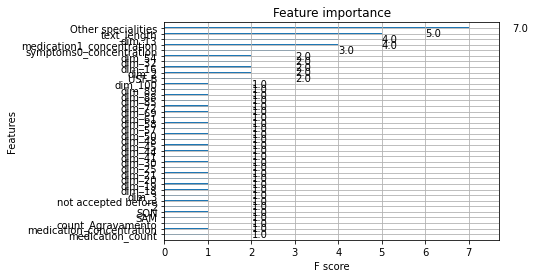

In [17]:
from xgboost import plot_importance

# Plot the feature importance scores
plot_importance(model_score)
plt.show()